In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn import metrics


In [2]:
df=pd.read_csv('telecom_churn.csv',low_memory=False)

In [3]:
df.drop(columns=['Churn','DataPlan','ContractRenewal','CustServCalls','AccountWeeks','OverageFee'],inplace=True)

In [4]:
df.rename(columns={'DataUsage':'Интернет_потрошња',
                  'DayMins': 'Број_искоришћених_минута',
                  'DayCalls': 'Број_позива',
                  'RoamMins': 'Број_искоришћених_роминг_минута',
                  'MonthlyCharge': 'Месечни_рачун'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Интернет_потрошња                3333 non-null   float64
 1   Број_искоришћених_минута         3333 non-null   float64
 2   Број_позива                      3333 non-null   int64  
 3   Месечни_рачун                    3333 non-null   float64
 4   Број_искоришћених_роминг_минута  3333 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 130.3 KB


In [6]:
df.median()

Интернет_потрошња                    0.0
Број_искоришћених_минута           179.4
Број_позива                        101.0
Месечни_рачун                       53.5
Број_искоришћених_роминг_минута     10.3
dtype: float64

In [7]:
scaler=preprocessing.StandardScaler()

In [8]:
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

In [14]:
silhoutte=[]
bic=[]
aic=[]
K=range(3,10)
for k in K:
    model = GaussianMixture(n_components=k,max_iter=100000,covariance_type='spherical',random_state=7)
    model.fit(df_scaled)
    labels = model.predict(df_scaled)
    silhoutte.append(metrics.silhouette_score(df_scaled, labels))
    bic.append(model.bic(df_scaled))
    aic.append(model.aic(df_scaled))


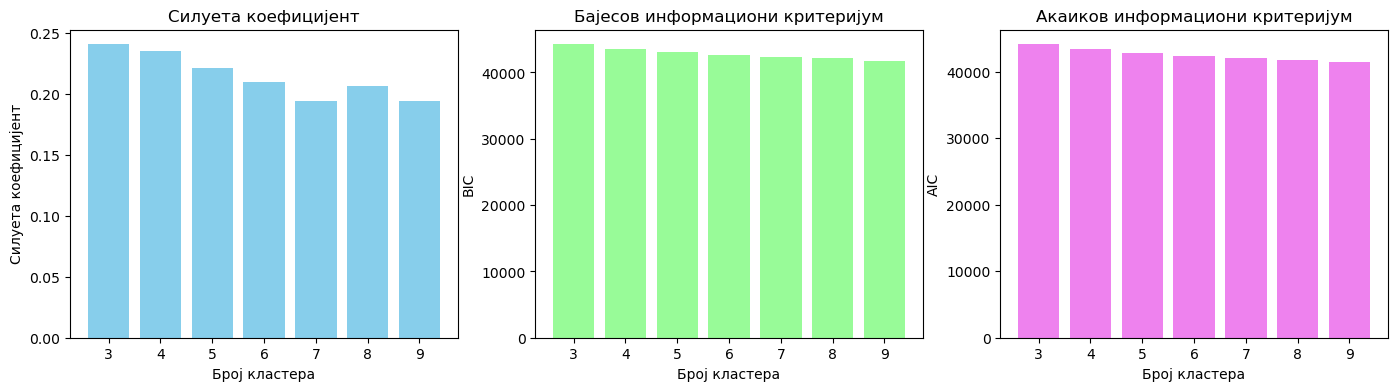

In [22]:
X = ['3','4','5','6','7','8','9']
X_axis = np.arange(len(X))

plt.figure(figsize=(17,4))

plt.subplot(1,3,1)
plt.bar(X_axis, silhoutte, label = 'Силуета коефицијент',color='skyblue')  
plt.xticks(X_axis, X)
plt.xlabel("Број кластера")
plt.ylabel("Силуета коефицијент")
plt.title("Силуета коефицијент")

plt.subplot(1,3,2)
plt.bar(X_axis, bic, label = 'BIC',color='palegreen')  
plt.xticks(X_axis, X)
plt.xlabel("Број кластера")
plt.ylabel("BIC")
plt.title("Бајесов информациони критеријум")

plt.subplot(1,3,3)
plt.bar(X_axis, aic, label = 'AIC',color='violet')  
plt.xticks(X_axis, X)
plt.xlabel("Број кластера")
plt.ylabel("AIC")
plt.title("Акаиков информациони критеријум")

plt.show()

In [10]:
gmm=GaussianMixture(n_components=4,max_iter=100000,covariance_type='spherical',random_state=7)
gmm.fit(df_scaled)

GaussianMixture(covariance_type='spherical', max_iter=100000, n_components=4,
                random_state=7)

In [11]:
labels=gmm.predict(df_scaled)

In [12]:
cluster1=df[labels==0].describe(percentiles=[.1,.25,.5,.75,.9,.95]).T

In [13]:
cluster1

,count,mean,std,min,10%,25%,50%,75%,90%,95%,max
Интернет_потрошња,879.0,0.071195,0.129714,0.0,0.00,0.00,0.0,0.0,0.31,0.341,0.51
Број_искоришћених_минута,879.0,228.808646,33.747779,170.4,191.02,203.15,222.4,248.7,274.44,293.030,350.80
Број_позива,879.0,103.401593,18.171708,48.0,80.00,91.00,104.0,115.0,126.00,133.100,157.00
Месечни_рачун,879.0,57.515131,6.776247,39.0,50.00,52.90,56.9,61.6,67.00,70.000,81.00
Број_искоришћених_роминг_минута,879.0,11.134016,2.134021,6.0,8.50,9.60,11.0,12.5,13.90,14.800,18.30


In [14]:
cluster2=df[labels==1].describe(percentiles=[.1,.25,.5,.75,.9,.95]).T

In [15]:
cluster2

,count,mean,std,min,10%,25%,50%,75%,90%,95%,max
Интернет_потрошња,772.0,2.976399,0.600917,1.65,2.24,2.540,2.94,3.350,3.78,4.05,5.4
Број_искоришћених_минута,772.0,185.059326,52.071710,40.90,116.07,149.975,185.90,220.100,252.32,271.95,322.4
Број_позива,772.0,100.686528,19.710951,35.00,77.00,88.000,101.00,114.000,126.00,135.00,163.0
Месечни_рачун,772.0,79.117617,10.807526,49.00,65.91,71.675,79.00,86.325,93.10,97.00,111.3
Број_искоришћених_роминг_минута,772.0,11.021632,2.225978,6.10,8.30,9.400,10.90,12.400,14.00,15.00,20.0


In [16]:
cluster3=df[labels==2].describe(percentiles=[.1,.25,.5,.75,.9,.95]).T 

In [17]:
cluster3

,count,mean,std,min,10%,25%,50%,75%,90%,95%,max
Интернет_потрошња,998.0,0.079419,0.195506,0.0,0.00,0.0,0.00,0.000,0.31,0.350,2.48
Број_искоришћених_минута,998.0,135.252104,35.264682,2.6,85.87,114.8,142.25,161.475,175.40,180.215,209.20
Број_позива,998.0,103.881764,18.511566,48.0,80.00,91.0,103.00,117.000,128.00,134.000,165.00
Месечни_рачун,998.0,40.903407,6.931371,15.7,31.00,37.0,41.80,46.000,49.00,51.000,56.20
Број_искоришћених_роминг_минута,998.0,11.236473,2.135071,6.3,8.60,9.8,11.10,12.600,14.10,15.000,18.90


In [18]:
cluster4=df[labels==3].describe(percentiles=[.1,.25,.5,.75,.9,.95]).T
cluster4

,count,mean,std,min,10%,25%,50%,75%,90%,95%,max
Интернет_потрошња,684.0,0.411827,0.686099,0.0,0.00,0.000,0.00,0.350,1.76,1.9955,2.32
Број_искоришћених_минута,684.0,175.760526,45.763087,0.0,118.12,148.175,177.00,203.725,230.16,248.2850,332.90
Број_позива,684.0,91.312865,22.124996,0.0,63.30,77.000,92.00,105.000,120.70,129.0000,160.00
Месечни_рачун,684.0,51.475000,9.756344,14.0,39.63,45.000,51.45,57.400,64.77,67.3700,84.00
Број_искоришћених_роминг_минута,684.0,6.741813,2.120721,0.0,4.33,5.700,6.80,7.900,9.10,10.0000,13.30


In [19]:
labels_initial_clustering=labels

In [20]:
gmm.means_

array([[-0.57538582,  0.83245515,  0.15610567,  0.0378866 ,  0.28640004],
       [ 1.69074782,  0.11513132,  0.01198873,  1.39516814,  0.28904825],
       [-0.56526823, -0.77506132,  0.15203394, -0.90272555,  0.33883558],
       [-0.32061761, -0.06966974, -0.38793114, -0.28877205, -1.05961365]])

In [21]:
gmm.covariances_

array([0.43689655, 0.64624944, 0.45301211, 0.68198026])

In [22]:
gmm.weights_

array([0.25771141, 0.22736662, 0.29038585, 0.22453612])

### Klasterovanje 4. klastera

In [23]:
df2=df[(labels_initial_clustering==3)]

In [24]:
df2_scaled=pd.DataFrame(scaler.fit_transform(df2),columns = df2.columns)

In [25]:
gmm2=GaussianMixture(n_components=2,max_iter=100000,covariance_type='spherical',random_state=0)
gmm2.fit(df2_scaled)
labels_0=gmm2.predict(df2_scaled)

C:\Users\Bojana\anaconda3_v2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [26]:
cluster4_1=df2[labels_0==0].describe(percentiles=[.1,.25,.5,.75,.9,.95]).T 

In [27]:
cluster4_1

,count,mean,std,min,10%,25%,50%,75%,90%,95%,max
Интернет_потрошња,570.0,0.133754,0.291488,0.0,0.00,0.000,0.00,0.23,0.35,0.461,2.13
Број_искоришћених_минута,570.0,179.039298,45.723555,0.0,125.59,152.525,179.45,206.25,232.22,253.860,332.90
Број_позива,570.0,89.949123,22.778120,0.0,61.00,74.000,90.00,104.00,121.00,129.000,160.00
Месечни_рачун,570.0,49.362105,8.869206,14.0,38.00,44.000,50.00,54.25,60.00,64.000,84.00
Број_искоришћених_роминг_минута,570.0,6.755614,2.277685,0.0,4.10,5.600,6.90,8.20,9.21,10.200,13.30


In [28]:
cluster4_2=df2[labels_0==1].describe(percentiles=[.1,.25,.5,.75,.9,.95]).T 

In [29]:
cluster4_2

,count,mean,std,min,10%,25%,50%,75%,90%,95%,max
Интернет_потрошња,114.0,1.802193,0.277695,1.13,1.43,1.590,1.81,2.030,2.151,2.210,2.32
Број_искоришћених_минута,114.0,159.366667,42.492824,58.80,104.99,127.525,160.75,191.875,211.610,227.395,264.30
Број_позива,114.0,98.131579,17.026015,59.00,76.00,87.250,98.00,107.000,118.700,129.350,138.00
Месечни_рачун,114.0,62.039474,6.641964,44.20,53.49,57.450,62.25,66.400,70.010,72.320,80.00
Број_искоришћених_роминг_минута,114.0,6.672807,1.027178,4.20,5.30,5.900,6.70,7.500,7.970,8.200,8.60


In [30]:
gmm2.means_

array([[-0.3925387 ,  0.06741684, -0.05059029, -0.21382376,  0.00962749],
       [ 2.00994224, -0.34519896,  0.25904085,  1.09485614, -0.04929629]])

In [31]:
gmm2.covariances_

array([0.84884562, 0.47652993])

In [32]:
gmm2.weights_

array([0.83661111, 0.16338889])

In [43]:
medijane_po_klasterima=pd.concat([cluster1['50%'], cluster2['50%'],cluster3['50%'],cluster4_1['50%'],cluster4_2['50%']], axis=1, 
          keys= ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4_1', 'Кластер 4_2'])

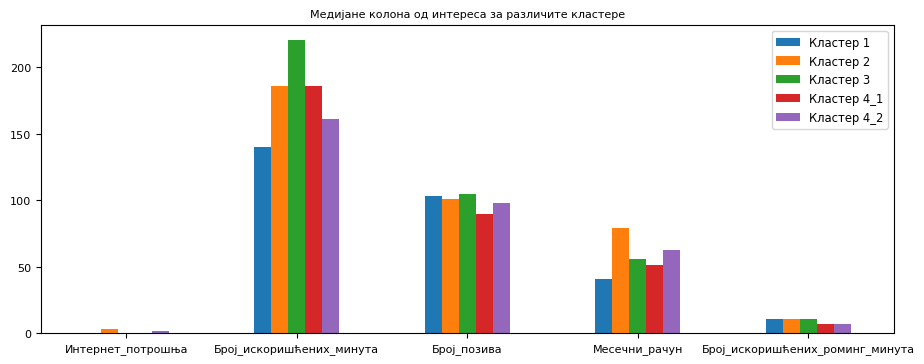

In [44]:
medijane_po_klasterima.plot(kind='bar',figsize=(11, 4), fontsize=8)
plt.xticks(rotation='horizontal')
plt.title('Медијане колона од интереса за различите кластере',fontsize=8)
plt.legend(fontsize='small')
plt.show()